# Prueba de evaluación 1 - Parte 1
- Entornos de data science con Python
- Curso 2015/16.
***
- Autor: Juan Antonio García Cuevas
- Fecha: 14/07/2016
***

# Parte 1
En esta primera parte trabajaremos con datos de cotización de Bitcoin. En esta página:
http://www.coindesk.com/price/
Se pueden descargar los valores de “cierre” de esa cotización en dólares en diferentes mercados “exchanges” mediante el botón “Export” del gráfico, como CSV.

### 1.1. Lectura de datos
- Obtén de coindex los datos de al menos tres exchanges como ficheros CSV separados para al menos un período de un año.
- Carga los datos como un DataFrame fusionando los ficheros en uno solo.
- Utiliza como índice la fecha de cotización.

Primero descargamos y guardamos varios ficheros de cotizaciónes de bitcoins desde la url:

[http://api.bitcoincharts.com/v1/csv/](http://api.bitcoincharts.com/v1/csv/)

Los tres ficheros descargados para este ejercicio son los siguientes:

- [CoinbaseUSD](http://api.bitcoincharts.com/v1/csv/coinbaseUSD.csv.gz)
- [BitfinexUSD](http://api.bitcoincharts.com/v1/csv/bitfinexUSD.csv.gz)
- [BtceUSD](http://api.bitcoincharts.com/v1/csv/btceUSD.csv.gz)

In [1]:
# Librerías
import pandas as pd 
import numpy as np
import datetime as dtm
import calendar as cal
import matplotlib.pyplot as plt
# GUI interna
%matplotlib inline 

In [2]:
# Defino una lista de ficheros CSV
csv_list = [['coinbaseUSD.csv', 'coinbase'], ['bitfinexUSD.csv', 'bitfinex'], ['btceUSD.csv', 'btce']]

In [3]:
# Creo una función para convertir timestamp en date
f_timestamp_2_date = lambda x: dtm.datetime.utcfromtimestamp(x).strftime('%Y/%m/%d')

In [4]:
# Creo una función para convertir date en timestamp
f_date_2_timestamp = lambda x: cal.timegm(dtm.datetime.strptime(x, '%d/%m/%Y').utctimetuple())

In [5]:
# Defino un rango de fechas en formato UNIXTIME para filtrar los datos de los CSV por el año 2015
date_ini = '01/01/2015'
date_fin = '01/01/2016'

ut_ini = f_date_2_timestamp(date_ini)
ut_fin = f_date_2_timestamp(date_fin)

print 'Fecha inicial:', date_ini, '->', ut_ini
print 'Fecha final..:', date_fin, '->', ut_fin

Fecha inicial: 01/01/2015 -> 1420070400
Fecha final..: 01/01/2016 -> 1451606400


In [6]:
# Creo una función para la carga y tratamiento de un fichero CSV
def cargar_datos_fichero(file, exchange):

    # Carga el fichero CSV
    data_csv = pd.read_csv('data/' + file, header=0, names=['date', 'price', 'amount'])
    
    # Elimina las columnas que no se necesitan
    del data_csv['amount']

    # Selecciona los datos del rango de fechas (año 2015)
    data_csv = data_csv[(data_csv['date'] >= ut_ini) & (data_csv['date'] < ut_fin)]

    # Convierte la fecha a formato date ('%Y/%m/%d')
    data_csv['date'] = data_csv['date'].apply(f_timestamp_2_date)
    
    # Ordena los datos por fecha
    data_csv = data_csv.sort_values(by='date')

    # selecciona el último dato de cada día
    data_csv['date2'] = data_csv['date']
    data_csv = data_csv.groupby('date2').last()

    # Rellena los huecos (NaN) con el valor anterior
    data_csv = data_csv.fillna(method='pad')
    # Rellena los huecos (NaN) interpolando
    #data_csv = data_csv.interpolate(method='linear')

    # Añade una columna con el exchange
    data_csv['exchange'] = exchange
    
    # Muestra información
    numrows_data, numcols_data = data_csv.shape
    print '\n--- Fichero: ', file
    print 'Número de filas CSV...:', numrows_data
    print 'Número de columnas CSV:', numcols_data
    print data_csv.head()

    # Muestra la gráfica
    title = 'Cotizacion: ' + exchange
    grp = data_csv[["price"]].plot(kind="line", title=title, figsize=(15,5), legend=False, fontsize=12)
    grp.set_xlabel("Fecha", fontsize=12)
    grp.set_ylabel("Precio", fontsize=12)
    plt.show()

    # Retorna el dataframe
    return data_csv


--- Fichero:  coinbaseUSD.csv
Número de filas CSV...: 353
Número de columnas CSV: 3
                  date   price  exchange
date2                                   
2015/01/08  2015/01/08  284.86  coinbase
2015/01/13  2015/01/13  260.00  coinbase
2015/01/14  2015/01/14  144.70  coinbase
2015/01/15  2015/01/15  205.82  coinbase
2015/01/16  2015/01/16  210.31  coinbase


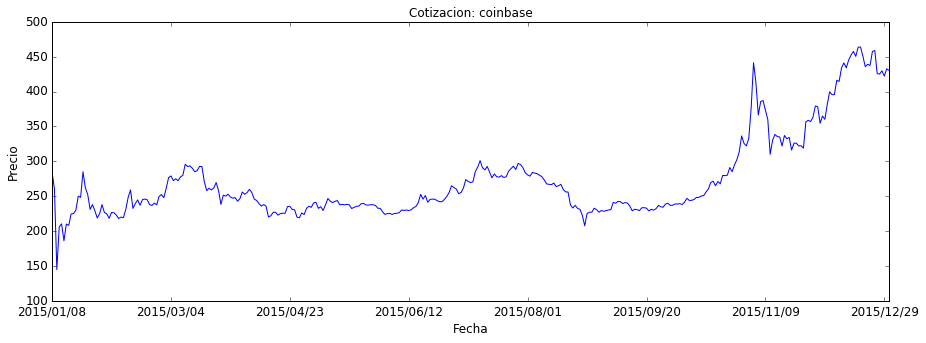

In [7]:
# Cargo el primer fichero CSV
csv1 = cargar_datos_fichero(csv_list[0][0], csv_list[0][1])


--- Fichero:  bitfinexUSD.csv
Número de filas CSV...: 365
Número de columnas CSV: 3
                  date   price  exchange
date2                                   
2015/01/01  2015/01/01  316.97  bitfinex
2015/01/02  2015/01/02  314.90  bitfinex
2015/01/03  2015/01/03  297.27  bitfinex
2015/01/04  2015/01/04  281.60  bitfinex
2015/01/05  2015/01/05  271.94  bitfinex


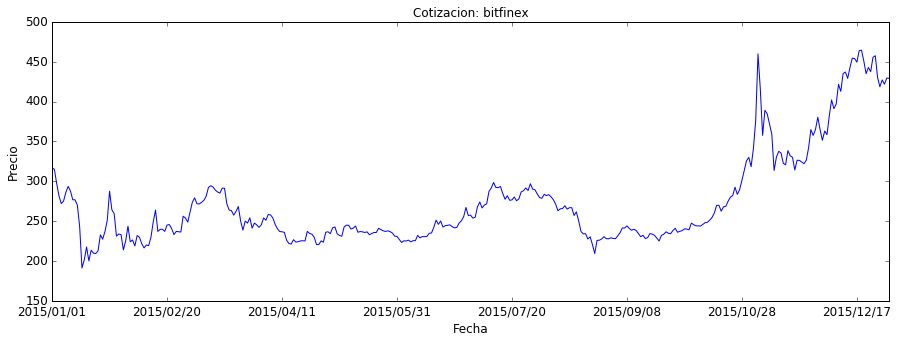

In [8]:
# Cargo el segundo fichero CSV
csv2 = cargar_datos_fichero(csv_list[1][0], csv_list[1][1])


--- Fichero:  btceUSD.csv
Número de filas CSV...: 357
Número de columnas CSV: 3
                  date    price exchange
date2                                   
2015/01/01  2015/01/01  313.989     btce
2015/01/02  2015/01/02  312.532     btce
2015/01/03  2015/01/03  298.000     btce
2015/01/04  2015/01/04  283.495     btce
2015/01/05  2015/01/05  269.310     btce


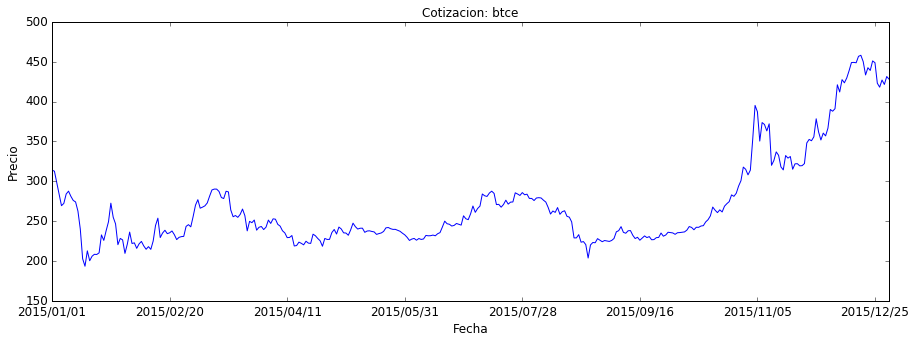

In [9]:
# Cargo el tercer fichero CSV
csv3 = cargar_datos_fichero(csv_list[2][0], csv_list[2][1])

Número de filas CSV...: 365
Número de columnas CSV: 7
Tiene valores nulos...: False
         date  price_x exchange_x  price_y exchange_y    price exchange
0  2015/01/08   284.86   coinbase   293.56   bitfinex  287.551     btce
1  2015/01/13   260.00   coinbase   242.60   bitfinex  240.021     btce
2  2015/01/14   144.70   coinbase   191.18   bitfinex  202.774     btce
3  2015/01/15   205.82   coinbase   201.33   bitfinex  193.383     btce
4  2015/01/16   210.31   coinbase   217.49   bitfinex  212.651     btce


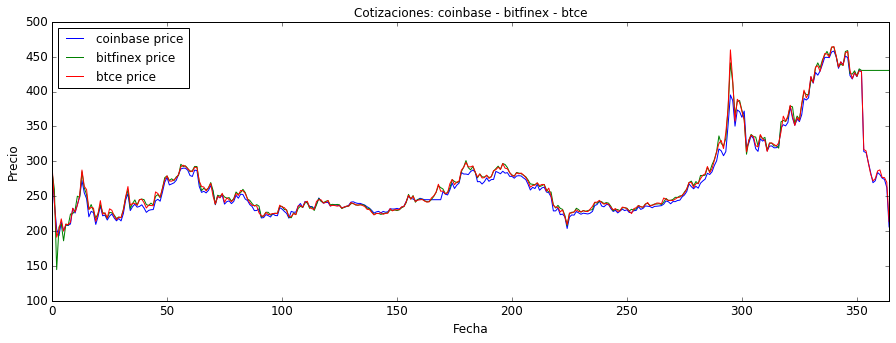

In [10]:
# Construyo el dataframe principal
data = csv1
data = data.merge(csv2, left_on='date', right_on='date', how='outer')
data = data.merge(csv3, left_on='date', right_on='date', how='outer')
data.sort_index()

# Relleno los huecos (NaN) con el valor anterior
data = data.fillna(method='pad')
# Rellena los huecos (NaN) interpolando
#data = data.interpolate(method='linear')

# Muestro información
numrows_data, numcols_data = data.shape
print 'Número de filas CSV...:', numrows_data
print 'Número de columnas CSV:', numcols_data
print 'Tiene valores nulos...:', data.isnull().values.any()
print data.head()

# Muestro la gráfica
title = 'Cotizaciones: ' + csv_list[0][1] + ' - ' + csv_list[1][1] + ' - ' + csv_list[2][1]
grp = data[['price', 'price_x', 'price_y']].plot(kind='line', title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel('Fecha',fontsize=12)
grp.set_ylabel('Precio',fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[1][1] + ' price', csv_list[2][1] + ' price'), loc='upper left')
plt.show()

Número de filas CSV...: 365
Número de columnas CSV: 4
Tiene valores nulos...: False
         date  p_csv2  p_csv3   p_csv1
0  2015/01/08  284.86  293.56  287.551
1  2015/01/13  260.00  242.60  240.021
2  2015/01/14  144.70  191.18  202.774
3  2015/01/15  205.82  201.33  193.383
4  2015/01/16  210.31  217.49  212.651


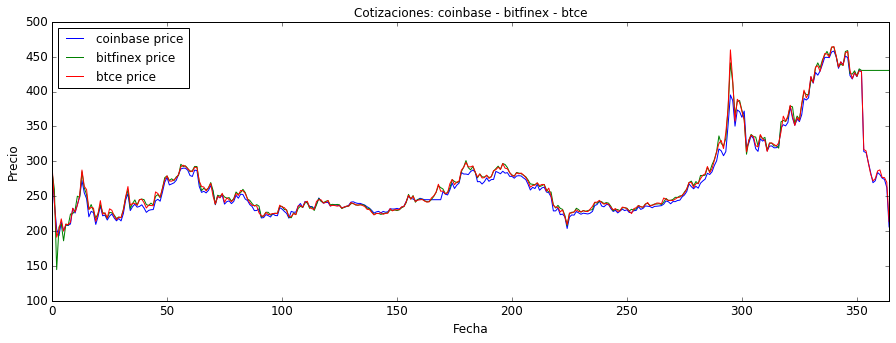

In [11]:
# Renombro y elimino columnas del data principal para quedarme con lo que me interesa
data.rename(columns={'price': 'p_csv1'}, inplace=True)
data.rename(columns={'price_x': 'p_csv2'}, inplace=True)
data.rename(columns={'price_y': 'p_csv3'}, inplace=True)
del data['exchange']
del data['exchange_x']
del data['exchange_y']

# Muestro información
numrows_data, numcols_data = data.shape
print 'Número de filas CSV...:', numrows_data
print 'Número de columnas CSV:', numcols_data
print 'Tiene valores nulos...:', data.isnull().values.any()
print data.head()

# Muestro la gráfica
title = 'Cotizaciones: ' + csv_list[0][1] + ' - ' + csv_list[1][1] + ' - ' + csv_list[2][1]
grp = data[['p_csv1', 'p_csv2', 'p_csv3']].plot(kind='line', title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel('Fecha',fontsize=12)
grp.set_ylabel('Precio',fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[1][1] + ' price', csv_list[2][1] + ' price'), loc='upper left')
plt.show()

### 1.3. Procesamiento
- Obtén los día de máximo y mínimo valor de cotización y un gráfico con la media móvil
(“rolling mean”) simple (https://en.wikipedia.org/wiki/Moving_average) de los valores de una de las series (puedes probar con varios valores de n). Nota: La media móvil puede encontrarse implementada en alguna biblioteca, no hace falta calcularla programando.
- Obtén el máximo “spread” (diferencia para el mismo día en los diferentes exchanges) del precio de bitcoin, y el “spread medio” para todo el periodo.
- Crea gráficos que los comparen dos a dos, y que muestren con alguna indicación gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”. Pista: puedes obtener un subconjunto del dataframe solo con estos días y dibujarlo como si fuese otra serie diferente.

Mayor cotización: 463.82 , fecha: 2015/12/19
Menor cotización: 144.7 , fecha: 2015/01/14


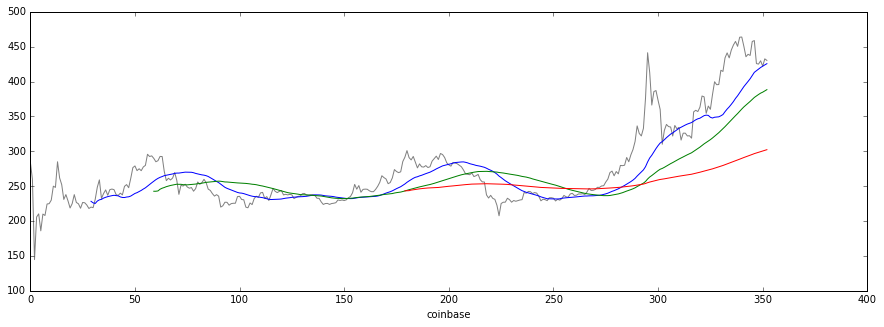

In [12]:
# Obtiene las fechas de menor y mayor cotización del primer csv
csv1 = csv1['2015-01-01':].sort_index()
print 'Mayor cotización:', csv1['price'].max(), ', fecha:', csv1['price'].argmax()
print 'Menor cotización:', csv1['price'].min(), ', fecha:', csv1['price'].argmin()

# Calcula la media móvil (rolling mean)
csv1p = csv1.reset_index()['price']
csv1p_rm30 = csv1p.rolling(window=30).mean()
csv1p_rm60 = csv1p.rolling(window=60).mean()
csv1p_rm180 = csv1p.rolling(window=180).mean()

# Elimina los datos NaN
csv1p_rm30.dropna(inplace=True)
csv1p_rm60.dropna(inplace=True)
csv1p_rm180.dropna(inplace=True)

# Muestra la gráfica
plt.figure(figsize=(15,5), dpi=80)
plt.plot(csv1p, color='gray', label='Cotizacion')
plt.plot(csv1p_rm30, color='blue', label='Rolling means 30')
plt.plot(csv1p_rm60, color='green', label='Rolling means 60')
plt.plot(csv1p_rm180, color='red', label='Rolling means 180')
plt.xlabel(csv_list[0][1])
plt.show()

Mayor cotización: 464.42 , fecha: 2015/12/19
Menor cotización: 191.18 , fecha: 2015/01/14


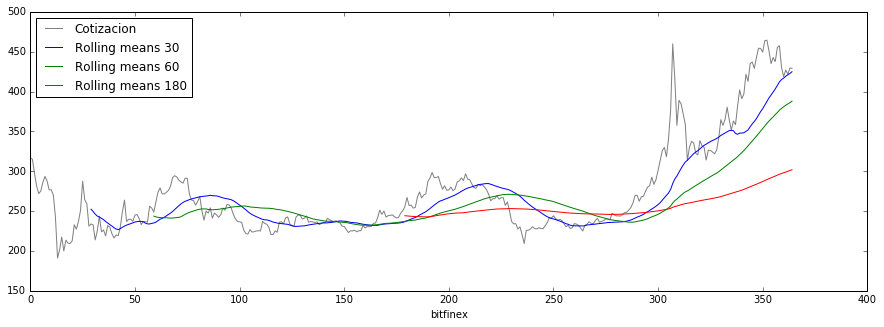

In [13]:
# Obtiene las fechas de menor y mayor cotización del segundo csv
csv2 = csv2['2015-01-01':].sort_index()
print 'Mayor cotización:', csv2['price'].max(), ', fecha:', csv2['price'].argmax()
print 'Menor cotización:', csv2['price'].min(), ', fecha:', csv2['price'].argmin()

# Calcula la media móvil (rolling mean)
csv2p = csv2.reset_index()['price']
csv2p_rm30 = csv2p.rolling(window=30).mean()
csv2p_rm60 = csv2p.rolling(window=60).mean()
csv2p_rm180 = csv2p.rolling(window=180).mean()

# Elimina los datos NaN
csv2p_rm30.dropna(inplace=True)
csv2p_rm60.dropna(inplace=True)
csv2p_rm180.dropna(inplace=True)

# Muestra la gráfica
plt.figure(figsize=(15,5), dpi=80)
plt.plot(csv2p, color='gray', label='Cotizacion')
plt.plot(csv2p_rm30, color='blue', label='Rolling means 30')
plt.plot(csv2p_rm60, color='green', label='Rolling means 60')
plt.plot(csv2p_rm180, color='red', label='Rolling means 180')
plt.legend(loc='upper left')
plt.xlabel(csv_list[1][1])
plt.show()

Mayor cotización: 458.0 , fecha: 2015/12/19
Menor cotización: 193.383 , fecha: 2015/01/15


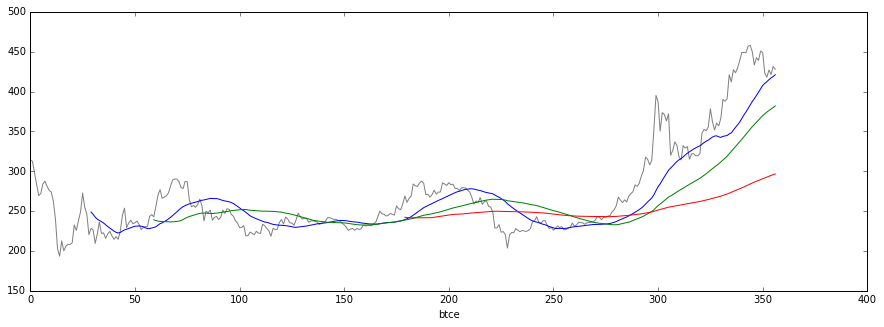

In [14]:
# Obtiene las fechas de menor y mayor cotización del tercer csv
csv3 = csv3['2015-01-01':].sort_index()
print 'Mayor cotización:', csv3['price'].max(), ', fecha:', csv3['price'].argmax()
print 'Menor cotización:', csv3['price'].min(), ', fecha:', csv3['price'].argmin()

# Calcula la media móvil (rolling mean)
csv3p = csv3.reset_index()['price']
csv3p_rm30 = csv3p.rolling(window=30).mean()
csv3p_rm60 = csv3p.rolling(window=60).mean()
csv3p_rm180 = csv3p.rolling(window=180).mean()

# Elimina los datos NaN
csv3p_rm30.dropna(inplace=True)
csv3p_rm60.dropna(inplace=True)
csv3p_rm180.dropna(inplace=True)

# Muestra la gráfica
plt.figure(figsize=(15,5), dpi=80)
plt.plot(csv3p, color='gray', label='Cotizacion')
plt.plot(csv3p_rm30, color='blue', label='Rolling means 30')
plt.plot(csv3p_rm60, color='green', label='Rolling means 60')
plt.plot(csv3p_rm180, color='red', label='Rolling means 180')

plt.xlabel(csv_list[2][1])
plt.show()

In [15]:
# Agrupa los precios por fecha
data_uni = pd.concat([csv1[['date', 'price']], csv2[['date', 'price']], csv3[['date', 'price']]])
data_uni = data_uni.groupby('date')

# Calcula los spread para cada fecha
max_spread = data_uni['price'].max()
min_spread = data_uni['price'].min()
spreads = max_spread - min_spread
print 'Fecha de spread máximo:', spreads.idxmax(), '. Spread máximo:', spreads.max()
print 'Fecha de spread mínimo:', spreads.idxmin(), '. Spread mínimo:', spreads.min()

# Calcula el spread medio del periodo
med_spread = spreads.mean()
print 'Spread medio del periodo:', med_spread

Fecha de spread máximo: 2015/11/04 . Spread máximo: 64.67
Fecha de spread mínimo: 2015/06/26 . Spread mínimo: 0.08
Spread medio del periodo: 5.73004931507


In [16]:
# Calcula los spreads por pares de precios
data['sp12'] = abs(data['p_csv1'] - data['p_csv2']) 
data['sp13'] = abs(data['p_csv1'] - data['p_csv3'])
data['sp23'] = abs(data['p_csv2'] - data['p_csv3'])

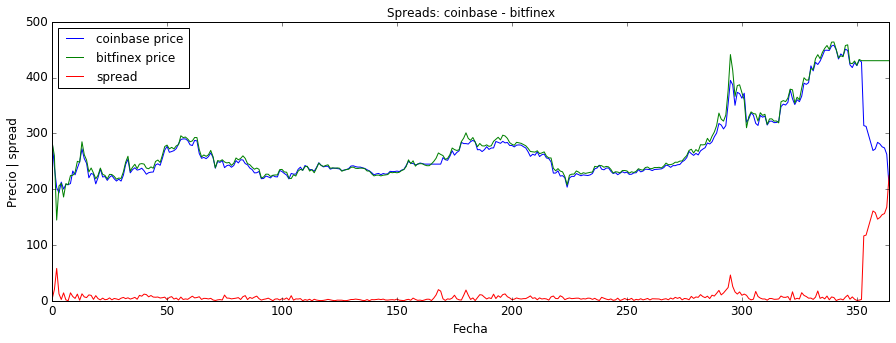

In [17]:
# Gráfica comparativa de precios csv1 y csv2
title = "Spreads: " + csv_list[0][1] + " - " + csv_list[1][1]
grp = data[["p_csv1", "p_csv2", "sp12"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread",fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[1][1] + ' price', 'spread'), loc='upper left')
plt.show()

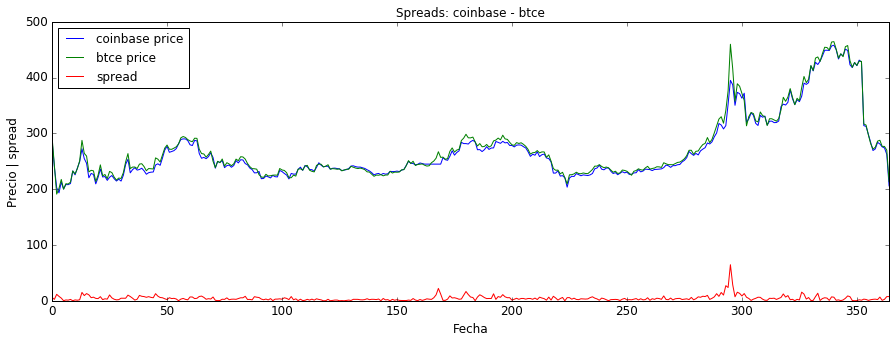

In [18]:
# Gráfica comparativa de precios csv1 y csv3
title = "Spreads: " + csv_list[0][1] + " - " + csv_list[2][1]
grp = data[["p_csv1", "p_csv3", "sp13"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread",fontsize=12)
plt.legend((csv_list[0][1] + ' price', csv_list[2][1] + ' price', 'spread'), loc='upper left')
plt.show()

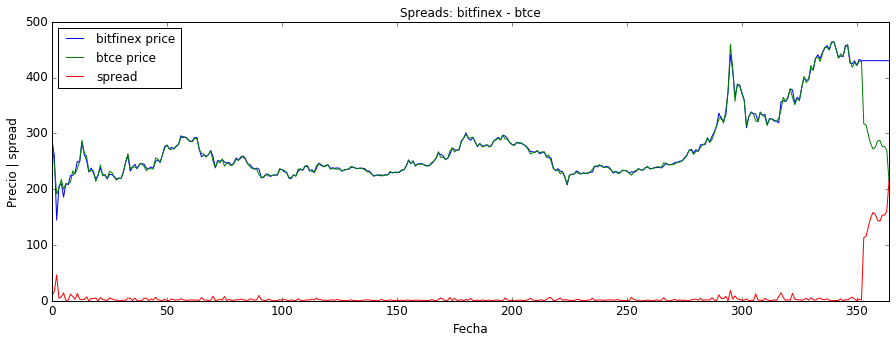

In [19]:
# Gráfica comparativa de precios csv2 y csv3
title = "Spreads: " + csv_list[1][1] + " - " + csv_list[2][1]
grp = data[["p_csv2", "p_csv3", "sp23"]].plot(kind="line", title=title, figsize=(15,5), legend=True, fontsize=12)
grp.set_xlabel("Fecha", fontsize=12)
grp.set_ylabel("Precio | spread", fontsize=12)
plt.legend((csv_list[1][1] + ' price', csv_list[2][1] + ' price', 'spread'), loc='upper left')
plt.show()